# EDA_Tiki Datasets
## 1. Data cleaning
### 1.1 Import libraries and datasets
* In here, I also merge all the datasets.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import STOPWORDS, WordCloud

In [2]:
# Load and union all the data
df_union = pd.DataFrame()
for i in range(1, 16):
    df = pd.read_csv("../Data/product-data-{}.csv".format(i))
    df_union = pd.concat([df_union, df], ignore_index=True)
# Preview the first 5 records
df_union.head()

,id,name,data_version,day_ago_created,price,list_price,original_price,discount,discount_rate,rating_average,...,favourite_count,all_time_quantity_sold,inventory_status,inventory_type,has_ebook,url_path,authors,seller_name;spid;price,breadcrumbs,number_of_page
0,53434797,Sách Tài Chính Cá Nhân Cho Người Việt Nam - Tặ...,3300,1147,184000,200000,200000,16000,8,4.7,...,0,13092.0,available,instock,False,sach-tai-chinh-ca-nhan-cho-nguoi-viet-nam-tang...,Lâm Minh Chánh,BizUni;53434798;184000 | HappyLive;59587392;20...,Nhà Sách Tiki | Sách tiếng Việt | Sách kinh tế...,NaN
1,75953557,Tâm Lý Học Về Tiền,3300,888,110000,189000,189000,79000,42,4.8,...,0,22842.0,available,instock,False,tam-ly-hoc-ve-tien-p75953557.html?spid=75953558,Morgan Housel,Tiki Trading;75953558;110000 | 1980 BOOKS HCM;...,Nhà Sách Tiki | Sách tiếng Việt | Sách kinh tế...,384.0
2,126853168,Thấu hiểu Hành vi giá Thị trường Tài chính (Un...,3300,627,367000,367000,367000,0,0,5.0,...,0,1459.0,available,instock,False,thau-hieu-hanh-vi-gia-thi-truong-tai-chinh-und...,NaN,finfin;126853169;367000 | SG Trading;142827069...,Nhà Sách Tiki | Sách tiếng Việt | Sách kinh tế...,448.0
3,146223395,Cách thức kinh doanh và đầu cơ cổ phiếu! – How...,3300,561,349000,349000,349000,0,0,4.8,...,0,3824.0,available,instock,False,cach-thuc-kinh-doanh-va-dau-co-co-phieu-how-to...,Richard Smitten,HappyLive;146223403;349000,Nhà Sách Tiki | Sách tiếng Việt | Sách kinh tế...,320.0
4,53532186,Tuyệt kỹ Giao dịch bằng đồ thị nến Nhật – Japa...,3300,1146,499000,499000,499000,0,0,4.8,...,0,12664.0,available,instock,False,tuyet-ky-giao-dich-bang-do-thi-nen-nhat-japane...,Steve Nison,HappyLive;53532187;499000,Nhà Sách Tiki | Sách tiếng Việt | Sách kinh tế...,392.0


### 1.2 Data overview

In [3]:
# Check the type and count the null value each column
df_union.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14467 entries, 0 to 14466
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      14467 non-null  int64  
 1   name                    14467 non-null  object 
 2   data_version            14467 non-null  int64  
 3   day_ago_created         14467 non-null  int64  
 4   price                   14467 non-null  int64  
 5   list_price              14467 non-null  int64  
 6   original_price          14467 non-null  int64  
 7   discount                14467 non-null  int64  
 8   discount_rate           14467 non-null  int64  
 9   rating_average          14467 non-null  float64
 10  review_count            14467 non-null  int64  
 11  favourite_count         14467 non-null  int64  
 12  all_time_quantity_sold  6898 non-null   float64
 13  inventory_status        14467 non-null  object 
 14  inventory_type          14467 non-null

In [4]:
# Summarize the dataframe
df_union.describe()


,id,data_version,day_ago_created,price,list_price,original_price,discount,discount_rate,rating_average,review_count,favourite_count,all_time_quantity_sold
count,1.446700e+04,14467.0,14467.000000,1.446700e+04,1.446700e+04,1.446700e+04,14467.000000,14467.000000,14467.000000,14467.000000,14467.0,6898.000000
mean,1.457192e+08,3300.0,2122.691781,1.862761e+05,2.155432e+05,2.151796e+05,29273.104721,13.047695,1.113106,6.443699,0.0,107.798637
std,8.703925e+07,0.0,32986.229635,1.990923e+05,2.169529e+05,2.171547e+05,41848.810490,11.036424,2.028361,79.376131,0.0,878.791665
min,3.159800e+05,3300.0,0.000000,1.500000e+04,1.500000e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
25%,5.789184e+07,3300.0,160.000000,1.001000e+05,1.180000e+05,1.180000e+05,0.000000,0.000000,0.000000,0.000000,0.0,2.000000
50%,1.740362e+08,3300.0,426.000000,1.393000e+05,1.680000e+05,1.680000e+05,19900.000000,12.000000,0.000000,0.000000,0.0,5.000000
75%,2.141605e+08,3300.0,1049.000000,2.115300e+05,2.450000e+05,2.450000e+05,38000.000000,20.000000,0.000000,0.000000,0.0,25.000000
max,2.633260e+08,3300.0,737992.000000,9.863000e+06,9.863000e+06,9.863000e+06,850000.000000,81.000000,5.000000,4381.000000,0.0,31797.000000


* Summarize some questionable fields: 'inventory_status', 'inventory_type', 'has_ebook '.

In [5]:
df_union['inventory_status'].value_counts()

inventory_status
available       14428
out_of_stock       16
discontinued       14
upcoming            9
Name: count, dtype: int64

In [6]:
df_union['inventory_type'].value_counts()

inventory_type
backorder       13526
instock           936
discontinued        4
upcoming            1
Name: count, dtype: int64

In [7]:
df_union['has_ebook '].value_counts()

has_ebook 
False    14467
Name: count, dtype: int64


### 1.2 Data Integrity
* No duplicated data.
* Incomplete data: 'all_time_quantity_sold', 'authors', 'number_of_page', 'seller_name;spid;price'.
* Inconsistent data: 'breadcrumbs', 'seller_name;spid;price'.
* Up-to-date: The collected date is 20/06/2023, which I will add in the output result. The 'data_version' value is the same in every records (3300), thus all data are in the same version.
### 1.3 Cleaning changelog
* 'id' field: Reformat to string type.

In [8]:
df_union['id'] = df_union['id'].astype(str)

* 'day_ago_created ' field: I notice some values here are too large (more than 5000 days). Thus, I remove the rows with total created day more than 4840 days (around 13 years and 3 months), since Tiki has established first in 3/2010. Then, I rename to 'existed_day_count'.

In [9]:
df_union = df_union[df_union['day_ago_created '] < 4080]
df_union.rename(columns = {'day_ago_created ' : 'existed_day_count'}, inplace = True)

* 'price', 'list_price', 'original_price', 'discount' fields: Divide the value by 1000 for better visualization. Rename columns to provide the unit.

In [10]:
df_union['price'] = df_union['price'] / 1000
df_union['list_price'] = df_union['list_price'] / 1000
df_union['original_price'] = df_union['original_price'] / 1000
df_union['discount'] = df_union['discount'] / 1000

df_union.rename(columns = {'price' : 'price_kvnd'}, inplace = True)
df_union.rename(columns = {'list_price' : 'list_price_kvnd'}, inplace = True)
df_union.rename(columns = {'original_price' : 'original_price_kvnd'}, inplace = True)
df_union.rename(columns = {'discount' : 'discount_kvnd'}, inplace = True)

* 'all_time_quantity_sold' field: Only products with at least 1 sold order will have values here. Thus I fill the null values with 0, change the field data type to integer, and change the name to 'quantity_sold_count'.

In [11]:
df_union['all_time_quantity_sold'] = df_union['all_time_quantity_sold'].fillna(0)
df_union['all_time_quantity_sold'] = df_union['all_time_quantity_sold'].astype('int64')
df_union.rename(columns = {'all_time_quantity_sold' : 'quantity_sold_count'}, inplace = True)

 * 'inventory_status' field: Only keep the products with 'available' status.

In [12]:
df_union = df_union[df_union['inventory_status'] == 'available']

* 'seller_name;spid;price' field: Since I did not collect the detailed data from each seller, this column is not very informative. Hence, I decide only count the total seller of each product here, and remove the null value (the product with no current seller). After that, I reformat and rename the column to 'seller_count'.

In [13]:
df_union['seller_name;spid;price'] = df_union['seller_name;spid;price'].str.count(';') / 2
df_union['seller_name;spid;price'] = df_union['seller_name;spid;price'].dropna()
df_union['seller_name;spid;price'] = df_union['seller_name;spid;price'].astype('int64')
df_union.rename(columns = {'seller_name;spid;price' : 'seller_count'}, inplace = True)

* 'breadcrumbs' field: Split the field with '|' delimiter to a new table. The only meaningful data to collect here is in the 4th column. Then, I strip the data and give a new column name 'category'.

In [14]:
df_union['breadcrumbs'] = df_union['breadcrumbs'].str.split('|', expand=True)[3]
df_union['breadcrumbs'] = df_union['breadcrumbs'].str.strip()
df_union.rename(columns = {'breadcrumbs' : 'category'}, inplace = True)

* Drop incomplete fields: 'authors', 'number_of_page'.
* Drop irrelevent fields: 'favorite_count' (have only 0 value here), 'has_ebook ' (have only Fasle data here), 'url_path','inventory_type'.
* Drop the used fields: 'data_version', 'inventory_status'.

In [15]:
# Drop fields with many null values, and irrelevant fields
df_id = df_union.drop(['data_version', 'favourite_count', 'has_ebook ','url_path', 
                       'inventory_status', 'inventory_type', 'authors', 'number_of_page'], axis = 1)

### 1.4 Data rechecking
* Review and summarize the final dataframe.

In [16]:
df_id.head()

,id,name,existed_day_count,price_kvnd,list_price_kvnd,original_price_kvnd,discount_kvnd,discount_rate,rating_average,review_count,quantity_sold_count,seller_count,category
0,53434797,Sách Tài Chính Cá Nhân Cho Người Việt Nam - Tặ...,1147,184.0,200.0,200.0,16.0,8,4.7,1754,13092,2,"Sách tài chính, tiền tệ"
1,75953557,Tâm Lý Học Về Tiền,888,110.0,189.0,189.0,79.0,42,4.8,3365,22842,17,"Sách tài chính, tiền tệ"
2,126853168,Thấu hiểu Hành vi giá Thị trường Tài chính (Un...,627,367.0,367.0,367.0,0.0,0,5.0,248,1459,2,"Sách tài chính, tiền tệ"
3,146223395,Cách thức kinh doanh và đầu cơ cổ phiếu! – How...,561,349.0,349.0,349.0,0.0,0,4.8,762,3824,1,"Sách tài chính, tiền tệ"
4,53532186,Tuyệt kỹ Giao dịch bằng đồ thị nến Nhật – Japa...,1146,499.0,499.0,499.0,0.0,0,4.8,2263,12664,1,"Sách tài chính, tiền tệ"


In [17]:
df_id.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14399 entries, 0 to 14466
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   14399 non-null  object 
 1   name                 14399 non-null  object 
 2   existed_day_count    14399 non-null  int64  
 3   price_kvnd           14399 non-null  float64
 4   list_price_kvnd      14399 non-null  float64
 5   original_price_kvnd  14399 non-null  float64
 6   discount_kvnd        14399 non-null  float64
 7   discount_rate        14399 non-null  int64  
 8   rating_average       14399 non-null  float64
 9   review_count         14399 non-null  int64  
 10  quantity_sold_count  14399 non-null  int64  
 11  seller_count         14399 non-null  int64  
 12  category             14399 non-null  object 
dtypes: float64(5), int64(5), object(3)
memory usage: 1.5+ MB


In [18]:
df_id.describe()

,existed_day_count,price_kvnd,list_price_kvnd,original_price_kvnd,discount_kvnd,discount_rate,rating_average,review_count,quantity_sold_count,seller_count
count,14399.000000,14399.000000,14399.000000,14399.000000,14399.000000,14399.000000,14399.000000,14399.000000,14399.000000,14399.000000
mean,644.325925,186.553812,215.953483,215.953483,29.399671,13.101813,1.111404,6.455726,51.604973,3.670463
std,598.714654,199.440653,217.310167,217.310167,41.903917,11.028958,2.027442,79.555767,610.606590,3.599105
min,0.000000,15.000000,15.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,160.000000,100.460000,118.900000,118.900000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,424.000000,139.300000,168.000000,168.000000,20.000000,12.000000,0.000000,0.000000,0.000000,2.000000
75%,1035.500000,211.650000,245.000000,245.000000,38.500000,20.000000,0.000000,0.000000,5.000000,5.000000
max,2305.000000,9863.000000,9863.000000,9863.000000,850.000000,81.000000,5.000000,4381.000000,31797.000000,28.000000


## 2. Exploratory Data Analysis
### 2.1 Quantity distribution
* Price Histogram

In [19]:
px.histogram(df_id, x = 'price_kvnd', title = 'Current Price Histogram', labels={'price_kvnd': 'Current Price (x 1000 VND)'})

Most of the products' price is lower 700,000 VND. Products that are more than 700,000 VND are mainly the combo of books.
* Discount Rate Histogram

In [20]:
px.histogram(df_id, x = 'discount_rate', title = 'Discount Rate Histogram', labels={'discount_rate': 'Discout Rate (%)'})

Around 4000 products do not have any discount. The common discount range are from 10% to 30%.
### 2.2 Correlation between quantities
* Correlation Table

In [21]:
df_id[['existed_day_count', 'price_kvnd', 'list_price_kvnd', 'original_price_kvnd', 'discount_kvnd', 
          'discount_rate', 'rating_average', 'review_count', 'quantity_sold_count',	'seller_count']].corr()

,existed_day_count,price_kvnd,list_price_kvnd,original_price_kvnd,discount_kvnd,discount_rate,rating_average,review_count,quantity_sold_count,seller_count
existed_day_count,1.000000,-0.011852,-0.000813,-0.000813,0.052193,0.106868,0.310216,0.066506,0.073105,0.340642
price_kvnd,-0.011852,1.000000,0.983426,0.983426,0.340491,-0.084124,0.002783,0.018291,0.009835,-0.069141
list_price_kvnd,-0.000813,0.983426,1.000000,1.000000,0.505322,0.045268,0.023817,0.017270,0.009681,-0.025352
original_price_kvnd,-0.000813,0.983426,1.000000,1.000000,0.505322,0.045268,0.023817,0.017270,0.009681,-0.025352
discount_kvnd,0.052193,0.340491,0.505322,0.505322,1.000000,0.635145,0.110265,0.002507,0.003395,0.197605
discount_rate,0.106868,-0.084124,0.045268,0.045268,0.635145,1.000000,0.215001,0.012768,0.021696,0.352672
rating_average,0.310216,0.002783,0.023817,0.023817,0.110265,0.215001,1.000000,0.148499,0.150786,0.305055
review_count,0.066506,0.018291,0.017270,0.017270,0.002507,0.012768,0.148499,1.000000,0.964401,0.045294
quantity_sold_count,0.073105,0.009835,0.009681,0.009681,0.003395,0.021696,0.150786,0.964401,1.000000,0.046575
seller_count,0.340642,-0.069141,-0.025352,-0.025352,0.197605,0.352672,0.305055,0.045294,0.046575,1.000000


Most of my hypothesis theories here are wrong, like the relationship between the price and the total review, or the total quantity sold and the total existed day of the product. However, some noticeable correlations have been observed:
* Total Review vs Total Quantity Sold

In [22]:
px.scatter(df_id, x = 'review_count', y = 'quantity_sold_count', title = 'Total Review vs Total Quantity Sold', 
           labels={'review_count': 'Number of Review', 'quantity_sold_count': 'Number of Quantity Sold'})

It is clearly to see a positive correlation here, which suggest the products with more review/feedback is likely to sell more others.
* Original Price vs Current Price

In [23]:
px.scatter(df_id, x = 'original_price_kvnd', y = 'price_kvnd', title = 'Original Price vs Current Price', 
           labels={'original_price_kvnd': 'Original Price (x 1000 VND)', 
                   'price_kvnd': 'Current Price (x 1000 VND)'})

Another positive correlation can be observed between the original price and the current one, which makes sense because most product have no or little discount rate.
### 2.3 Category Comparison
* Summary table

In [24]:
df_category = df_id.groupby('category').agg({'id': 'count', 'discount_rate': 'mean', 
                                             'quantity_sold_count': 'mean'}).reset_index()
df_category


,category,id,discount_rate,quantity_sold_count
0,Bài học kinh doanh,1989,14.895425,98.753645
1,Sách Marketing - Bán hàng,1996,13.827655,51.636273
2,Sách doanh nhân,1061,13.439208,19.817154
3,Sách khởi nghiệp,1165,11.735622,50.163948
4,Sách kinh tế học,1641,12.097502,18.365021
5,Sách kỹ năng làm việc,1991,14.674033,44.676042
6,Sách quản trị nhân lực,412,12.723301,21.247573
7,"Sách quản trị, lãnh đạo",1986,12.323263,16.799094
8,"Sách tài chính, kế toán",323,12.170279,26.659443
9,"Sách tài chính, tiền tệ",1835,11.324251,105.880654


* Percentage of Product in each Category

In [25]:
fig = px.pie(df_category, values = 'id', names='category', title='Percentage of Product in each Category')
fig.update_traces(direction = 'clockwise', textposition = 'inside', textinfo = 'percent')

The top 4 categories with largest product-id are pretty closed to each other: 'Sách Marketing - Bán hàng', 'Sách kỹ năng làm việc', 'Bài học kinh doanh', 'Sách quản trị, lãnh đạo'.
* Mean Total Quantity Sold per Category

In [26]:
px.bar(df_category, x = 'quantity_sold_count', y = 'category', orientation = 'h', 
       title = 'Mean Total Quantity Sold per Category', labels={'category': '', 'quantity_sold_count': 'Mean Number of Quantity Sold'})

We can see that the most popular categories are 'Sách tài chính, tiền tệ' and 'Bài học kinh doanh'.
* Mean Discount Rate per Category

In [27]:
px.bar(df_category, x = 'discount_rate', y = 'category', orientation = 'h', 
       title = 'Mean Discount Rate per Category', labels={'category': '', 'discount_rate': 'Mean Discount Rate (%)'})

The dis count rates are similar between the categories. The only two class with more than 14% discount rate are 'Sách kỹ năng làm việc' and 'Bài học kinh doanh'.
### 2.4 Other aspects
* Most Frequent Words in Books' Name

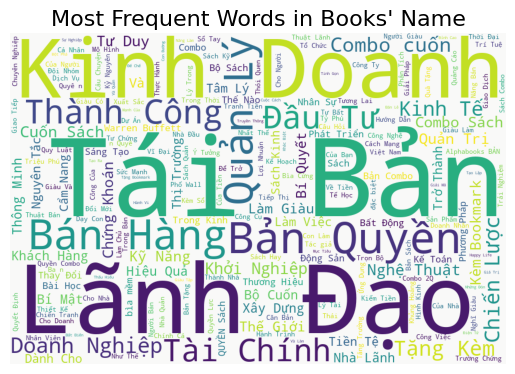

In [28]:
word_frequency = WordCloud(background_color = '#F9F9F8', width = 900, height = 600, stopwords = STOPWORDS)
word_frequency = word_frequency.generate(' '.join(df_id['name'].values))
plt.imshow(word_frequency)
plt.axis('off')
plt.title("Most Frequent Words in Books' Name", fontsize = 16)
plt.show()

It is clearly to see the most used words here are: 'Tái bản', 'Lãnh Đạo', 'Kinh doanh'. While 'Lãnh đạo' and 'Kinh doanh' are common Vietnamese terms in economic field, 'Tái bản' stands for an updated version of a book.
* Best seller

In [29]:
best_seller = df_id.nlargest(10, ['review_count', 'rating_average', 'quantity_sold_count'])
best_seller[['id', 'name', 'price_kvnd', 'review_count', 'rating_average', 'quantity_sold_count']]

,id,name,price_kvnd,review_count,rating_average,quantity_sold_count
12481,3608625,Payback Time - Ngày Đòi Nợ,299.0,4381,4.8,31797
1,75953557,Tâm Lý Học Về Tiền,110.0,3365,4.8,22842
7,11122712,Bộ sách Làm Giàu Từ Chứng Khoán (How To Make M...,700.0,2390,4.8,15283
12474,3608623,Bí Mật Của Phan Thiên Ân,69.0,2355,4.8,24463
10237,1926761,Khởi Nghiệp Bán Lẻ - Bí Quyết Thành Công Và Gi...,125.0,2274,4.8,28593
4,53532186,Tuyệt kỹ Giao dịch bằng đồ thị nến Nhật – Japa...,499.0,2263,4.8,12664
12491,57110087,Siêu Cò – How To Be A Power Connector,249.0,2221,4.8,13178
6588,76013378,Storytelling With Data - Kể Chuyện Thông Qua D...,228.0,1773,5.0,10249
39,9695881,Nghệ Thuật đầu tư Dhandho - The Dhandho Investor,238.0,1765,4.8,10844
0,53434797,Sách Tài Chính Cá Nhân Cho Người Việt Nam - Tặ...,184.0,1754,4.7,13092


I want to find the top 10 best seller books based on their popularities, representing by the total review, mean rating and total quanity sold.
## 3. Export the clean dataset

In [30]:
df_id.to_csv('../Data/Tiki_product_data_20230620.csv', index=False, encoding='utf-8-sig')